<a href="https://colab.research.google.com/github/wyy511511/Chinese-Word-Vectors/blob/master/%E2%80%9C2_all_3cProduct_will_improve_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/Colab Notebooks/"


Mounted at /content/drive


   Unnamed: 0  reviews.rating  \
0       22908             4.0   
1        1338             5.0   
2       10234             5.0   
3        4077             5.0   
4       31516             4.0   

                                          categories  \
0  Stereos,Remote Controls,Amazon Echo,Audio Dock...   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  Fire Tablets,Tablets,Computers & Tablets,All T...   
3  Fire Tablets,Tablets,Computers & Tablets,All T...   
4  Back To College,College Electronics,College Tv...   

                                    verified_reviews  positive  
0  Before the Echo we played music often for our ...       1.0  
1  Great easy tablet for a reasonable price. Not ...       1.0  
2  Perfect gift for my mother and mother in law. ...       1.0  
3  Perfect tablet for my 4 yr old grandson. Easy ...       1.0  
4  This tv box works great!!! Easy to play, and g...       1.0  
Unique words:  15513
[('the', 13838), ('to', 10549), ('and', 10315), ('for

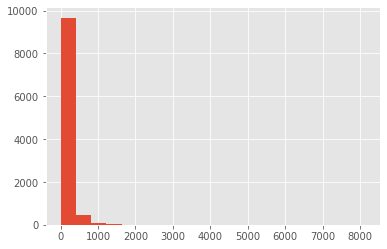

In [3]:
# 这个是https://www.kaggle.com/code/justjun0321/are-voice-assistants-really-improving-our-lives
# senta37 conda
# conda activate senta37

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib style 
plt.style.use('ggplot')

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime
from string import punctuation


# Import data and transform tsv file

path = "drive/MyDrive/Colab Notebooks/"
import pandas as pd 
import os
os.getcwd()
#data1 = pd.read_csv('../input/amazon-alexa-reviews/amazon_alexa.tsv', delimiter='\t') 
#vscode 可能因为是terminal跑的所以可以吧 
data = pd.read_csv(path+'1429_1-amazon的电子产品评论-after clean.csv')
data1 = pd.read_csv(path+'1429_1-amazon的电子产品评论-after clean.csv')

print(data.head())

# TODO 合并多个数据集


# Transform string data and remove punctuation
data['verified_reviews'] = data.verified_reviews.apply(lambda x: x.lower())
data['verified_reviews'] = data.verified_reviews.apply(lambda x: ''.join([c for c in x if c not in punctuation]))
# Get length of review for EDA
data['review_length'] = data.verified_reviews.apply(lambda x: len(x))

# And take a look at the distribution of the length
data['review_length'].hist(bins=20)
# plt.title('Distribution of review length')
# plt.savefig("./testpic.jpg")
# plt.show()

#codereuse
#plt.savefig('./test2.jpg')放到了plt.show()之后，只要先保存在显示就可以正常保存了。
# Transform date to datetime data type
# data['date'] = data.date.apply(lambda x:  datetime.datetime.strptime(x, '%d-%b-%y'))
# print(data.info())
# pip install pandas --upgrade 版本不匹配 TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
rating              3150 non-null int64
date                3150 non-null datetime64[ns]
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
review_length       3150 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.7+ KB
'''

np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data['verified_reviews'].tolist())

#A = np.array() mask 可以是 WordCloud的参数 
# wordcloud = WordCloud(background_color="black").generate(reviews)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.margins(x=0, y=0)
# plt.title('Reviews',size=20)
# plt.savefig("./test3.jpg")
# plt.show()

# print(data.rating.value_counts())
# data5 = data[data.rating == 5]
# data_not_5 = data[data.rating != 5]
# data1 = data[data.rating == 1]
# data5[data5['verified_reviews'].str.contains('easy')]['verified_reviews'][:3]


#idea TODO 可以用 一分 五分 情感识别一下 
# sns.set(rc={'figure.figsize':(14,8)})
# reviews = ' '.join(data1['verified_reviews'].tolist())

# wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.margins(x=0, y=0)
# plt.title('Reviews of rating 1',size=20)
# plt.show()


# 针对每个产品型号的评分的箱线图

# 
# data_date = data.groupby('date').count()
# data_date.rating.plot()

# #
# sns.boxplot('rating','review_length',data=data)
# data['log_review_length'] = data.review_length.apply(lambda x: (np.log(x)+1))
# sns.boxplot('rating','log_review_length',data=data)

# sns.boxplot('variation','log_review_length',data=data)
# plt.xticks(rotation = 90)


from collections import Counter

text = ' '.join(data['verified_reviews'].tolist())
review_word = text.split(' ')
all_reviews = ' '.join(review_word)
words = all_reviews.split()

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints = []
for review in review_word:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])
print('Unique words: ', len((vocab_to_int)))
print(counts.most_common(20))
'''
Unique words:  4613
[('the', 3245), ('i', 2952), ('to', 2821), ('it', 2550), 
('and', 2219), ('a', 1503), ('my', 1390), ('is', 1218), ('for', 1061), 
('love', 951), ('echo', 825), ('this', 823), ('with', 786), ('of', 766), ('have', 753),
 ('great', 717), ('in', 653), ('that', 651), ('but', 634), ('alexa', 586)]
'''

# data1['rating'].value_counts()
text1 = ' '.join(data1['verified_reviews'].tolist())
review_word1 = text1.split(' ')
all_reviews1 = ' '.join(review_word1)
words1 = all_reviews1.split()

# words wrong datatype
counts1 = Counter(words1)
vocab1 = sorted(counts1, key=counts1.get, reverse=True)
vocab_to_int1 = {word: ii for ii, word in enumerate(vocab1, 1)}

reviews_ints1 = []
for review in review_word1:
    reviews_ints1.append([vocab_to_int1[word] for word in review.split()])

#这个输出结果和 全部的 最普通的词 The only different I found between rating 1 data most common words is "but".


In [4]:
# pip install spacy
# 下载压缩包 
#python -m spacy download en
# pip install /Users/a511/Downloads/en_core_web_md-2.2.5.tar.gz
# https://blog.csdn.net/qq_43965708/article/details/114028746 版本兼容 
#https://github.com/OmkarPathak/pyresparser/issues/46
import spacy
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [5]:
for i in range(15,20):
    one_sentence = data1['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [6]:
data['positive'] = 0
data['rating'] = data['reviews.rating']
data.loc[data['rating'] ==5, 'positive'] = 1

y = data['positive']

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.tokenize import word_tokenize 

word_tokenize(data.verified_reviews[0])

['before',
 'the',
 'echo',
 'we',
 'played',
 'music',
 'often',
 'for',
 'our',
 'toddler',
 'via',
 'pandora',
 'on',
 'the',
 'amazon',
 'firestick',
 'i',
 'am',
 'generally',
 'not',
 'an',
 'early',
 'adopter',
 'for',
 'the',
 'newest',
 'technology',
 'but',
 'with',
 'a',
 '95',
 'music',
 'use',
 'case',
 'in',
 'mind',
 'and',
 'to',
 'experiment',
 'i',
 'pulled',
 'the',
 'trigger',
 'and',
 'bought',
 'one',
 'within',
 'a',
 'week',
 'i',
 'subscribed',
 'to',
 'the',
 'singledevice',
 'option',
 'for',
 'amazon',
 'music',
 'unlimited',
 'at',
 'a',
 'cost',
 'of',
 '399month',
 'after',
 'a',
 'free',
 '30day',
 'trial',
 'now',
 'we',
 'rarely',
 'use',
 'pandora',
 'due',
 'to',
 'the',
 'expansive',
 'amazon',
 'selection',
 'i',
 'also',
 'upgraded',
 'to',
 'a',
 'smart',
 'thermostat',
 'and',
 'am',
 'looking',
 'into',
 'philips',
 'hue',
 'color',
 'lighting',
 'my',
 'experience',
 'has',
 'been',
 'positive',
 'enough',
 'to',
 'also',
 'buy',
 'an',
 'echo

In [9]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

data['cleaned_reviews'] = data.verified_reviews.apply(lambda x: word_tokenize(x))

data['cleaned_reviews'] = data.cleaned_reviews.apply(lambda x: [w for w in x if w not in stop_words])

data['cleaned_reviews'] = data.cleaned_reviews.apply(lambda x: ' '.join(x))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10202 entries, 0 to 10201
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10202 non-null  int64  
 1   reviews.rating    10202 non-null  float64
 2   categories        10202 non-null  object 
 3   verified_reviews  10202 non-null  object 
 4   positive          10202 non-null  int64  
 5   review_length     10202 non-null  int64  
 6   rating            10202 non-null  float64
 7   cleaned_reviews   10202 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 637.8+ KB


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(data["cleaned_reviews"], y, test_size=0.33
                                    ,random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

y_train = np.asarray(y_train.values)

ch2 = SelectKBest(chi2, k = 300)

X_new = ch2.fit_transform(count_train, y_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

X_test_new = ch2.transform(X=count_test)

In [12]:
print(y)

0        0
1        1
2        1
3        1
4        0
        ..
10197    1
10198    0
10199    0
10200    1
10201    1
Name: positive, Length: 10202, dtype: int64


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [14]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   01052016  01162017  0ne  10  100  1000  10000speaker  1000s  100great  \
0         0         0    0   0    0     0             0      0         0   
1         0         0    0   0    0     0             0      0         0   
2         0         0    0   0    0     0             0      0         0   
3         0         0    0   0    0     0             0      0         0   
4         0         0    0   0    0     0             0      0         0   

   100happier  ...  youtubing  youve  yr  yrs  yuh  zelda  zero  \
0           0  ...          0      0   0    0    0      0     0   
1           0  ...          0      0   0    0    0      0     0   
2           0  ...          0      0   0    0    0      0     0   
3           0  ...          0      0   0    0    0      0     0   
4           0  ...          0      0   0    0    0      0     0   

   zombiesotherwise  zoo  zwave  
0                 0    0      0  
1                 0    0      0  
2                 0    0      0  
3   

In [15]:
# print(difference)
# Print the head of count_df
# print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

   01052016  01162017  0ne   10  100  1000  10000speaker  1000s  100great  \
0       0.0       0.0  0.0  0.0  0.0   0.0           0.0    0.0       0.0   
1       0.0       0.0  0.0  0.0  0.0   0.0           0.0    0.0       0.0   
2       0.0       0.0  0.0  0.0  0.0   0.0           0.0    0.0       0.0   
3       0.0       0.0  0.0  0.0  0.0   0.0           0.0    0.0       0.0   
4       0.0       0.0  0.0  0.0  0.0   0.0           0.0    0.0       0.0   

   100happier  ...  youtubing  youve   yr  yrs  yuh  zelda  zero  \
0         0.0  ...        0.0    0.0  0.0  0.0  0.0    0.0   0.0   
1         0.0  ...        0.0    0.0  0.0  0.0  0.0    0.0   0.0   
2         0.0  ...        0.0    0.0  0.0  0.0  0.0    0.0   0.0   
3         0.0  ...        0.0    0.0  0.0  0.0  0.0    0.0   0.0   
4         0.0  ...        0.0    0.0  0.0  0.0  0.0    0.0   0.0   

   zombiesotherwise  zoo  zwave  
0               0.0  0.0    0.0  
1               0.0  0.0    0.0  
2               0.0  0.0  

In [16]:
print(tfidf_df.columns)

Index(['01052016', '01162017', '0ne', '10', '100', '1000', '10000speaker',
       '1000s', '100great', '100happier',
       ...
       'youtubing', 'youve', 'yr', 'yrs', 'yuh', 'zelda', 'zero',
       'zombiesotherwise', 'zoo', 'zwave'],
      dtype='object', length=11750)


In [17]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB


# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_new, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test_new)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

Accuracy is: 0.743985743985744
F score is: 0.827323717948718


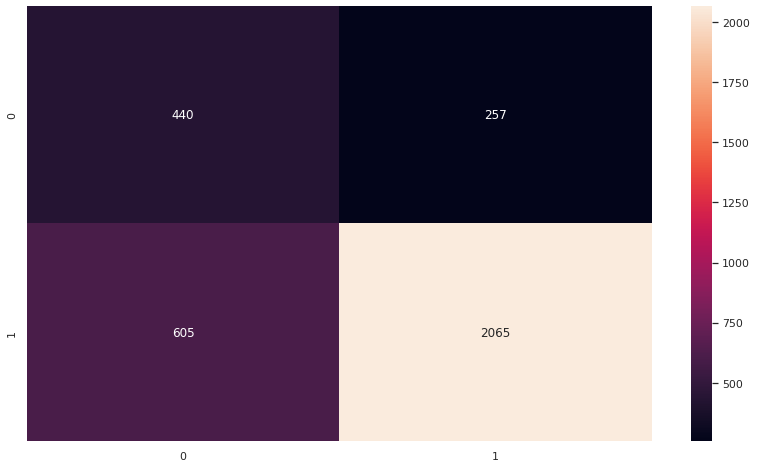

In [18]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfTransformer
def TextPreprocessing(train,train_y,test):
    
    CountVectorizer(stop_words="english")
    count = count_vectorizer.fit_transform(train)
    count_test = count_vectorizer.transform(X_test)
    
    tfidf_vectorizer = TfidfTransformer()
    tfidf = tfidf_vectorizer.fit_transform(count)
    tfidf_test = tfidf_vectorizer.transform(count_test)
    
    ch2 = SelectKBest(chi2, k = 300)
    
    train_new = ch2.fit_transform(tfidf, y_train)
    test_new = ch2.transform(tfidf_test)
    
    return train_new, test_new

train, test = TextPreprocessing(X_train,y_train,X_test)


clf = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf.fit(train, y_train)

# Create the predicted tags: pred
pred = clf.predict(test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

clf = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = clf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)




# clf = RandomForestClassifier()

# scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5)

# parameters = {'n_estimators': [150, 180, 250], 'max_features': [120,150], 'max_depth': [120,135,150],
#               'min_samples_split':[3,5],'min_samples_leaf':[1,3,5]}

# grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# grid_fit = grid_obj.fit(X_new, y_train)

# # Get the estimator
# best_clf = grid_fit.best_estimator_

# best_predictions = best_clf.predict(X_test_new)

# score = metrics.accuracy_score(y_test, best_predictions)
# print('Accuracy is:',score)
# f1 = metrics.f1_score(y_test, best_predictions)
# print('F score is:',f1)



Accuracy is: 0.7024057024057024
F score is: 0.7961757526444263
Accuracy is: 0.7419067419067419
F score is: 0.8355723746452223


In [20]:

clf = RandomForestClassifier()

scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5)

parameters = {'n_estimators': [150, 180, 250], 'max_features': [120,150], 'max_depth': [120,135,150],
              'min_samples_split':[3,5],'min_samples_leaf':[1,3,5]}

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_new, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

best_predictions = best_clf.predict(X_test_new)

score = metrics.accuracy_score(y_test, best_predictions)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, best_predictions)
print('F score is:',f1)

Accuracy is: 0.7228987228987229
F score is: 0.8102501525320317


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


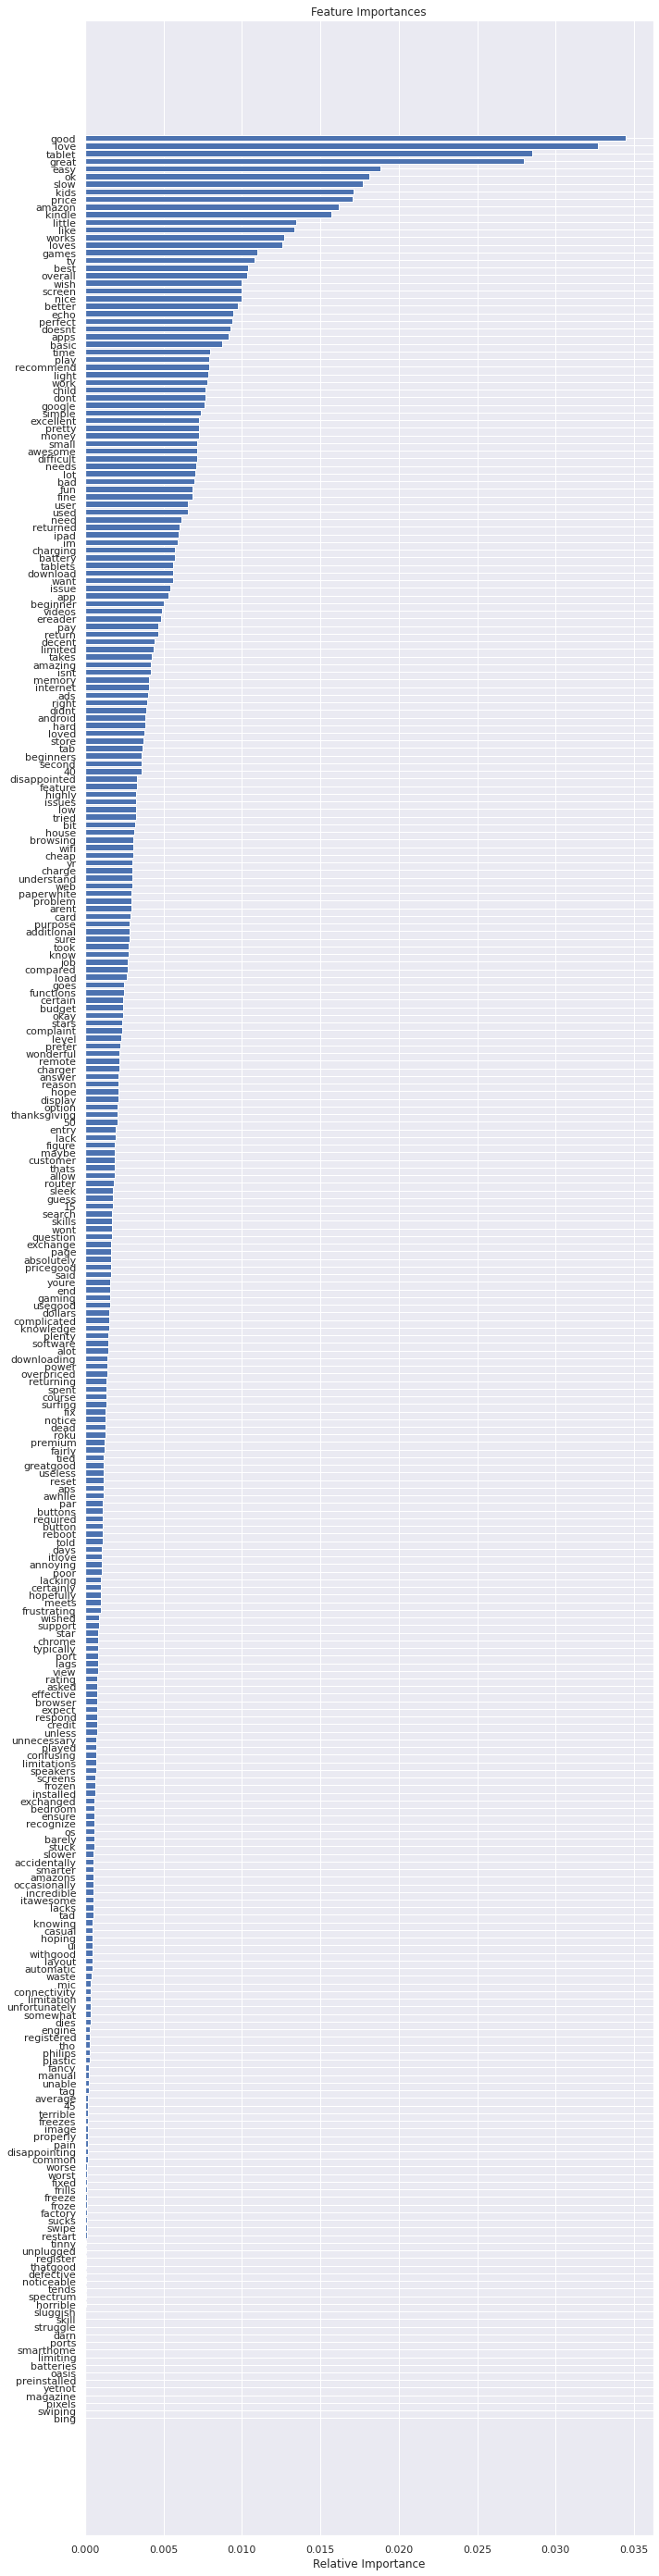

In [21]:
from itertools import compress

features = count_vectorizer.get_feature_names()
mask = ch2.get_support()
features = list(compress(features, mask))
importances = best_clf.feature_importances_
#importances = clf.feature_importances_
indices = np.argsort(importances)

sns.set(rc={'figure.figsize':(11,50)})

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [22]:

!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

X_test_new = X_test_new.toarray()

perm = PermutationImportance(best_clf, random_state=1).fit(X_test_new, y_test)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0101 ± 0.0020,great
0.0097 ± 0.0056,love
0.0080 ± 0.0039,slow
0.0071 ± 0.0056,tablet
0.0070 ± 0.0011,ok
0.0062 ± 0.0027,overall
0.0049 ± 0.0031,good
0.0046 ± 0.0013,needs
0.0041 ± 0.0049,price
0.0033 ± 0.0017,kids


In [ ]:
import pkg_resources
print(pkg_resources.__file__)

In [23]:
print(type(best_clf))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [24]:
print(best_clf)

RandomForestClassifier(max_depth=120, max_features=120, min_samples_split=5,
                       n_estimators=180)


In [26]:
test_clf = RandomForestClassifier(max_depth=110, max_features=110, min_samples_split=5,
                       n_estimators=180)
test_clf.fit(X_new, y_train)
test_predictions = test_clf.predict(X_test_new)

score = metrics.accuracy_score(y_test, test_predictions)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, test_predictions)
print('F score is:',f1)

Accuracy is: 0.7211167211167211
F score is: 0.8097264437689969


In [ ]:
test 修改 